In [1]:
# Importamos librerias  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Datos de entrenamiento
X_train = pd.read_csv('../Corpus/splited_data/X_train.csv', index_col=0)
y_train = pd.read_csv('../Corpus/splited_data/y_train.csv', index_col=None)
y_train = y_train["genero"]
print(X_train.shape)
print(y_train.shape)

(144000, 96)
(144000,)


              C1        C2  genero
0       1.068284  0.560311       1
1       0.325207 -2.271634       1
2      -1.407940 -1.335119       1
3       0.575665 -2.227278       1
4       2.475130 -0.610114       1
...          ...       ...     ...
143995 -1.736958 -2.032635       1
143996 -0.985668  0.258679       0
143997 -1.654177  1.178365       0
143998  1.430815  0.386969       0
143999 -1.619151  1.468112       1

[144000 rows x 3 columns]


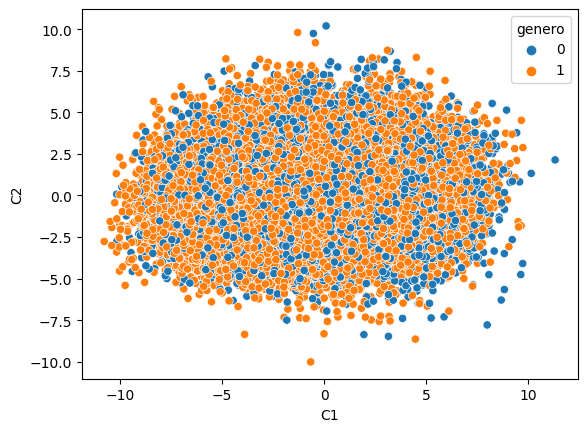

In [19]:
from sklearn.decomposition import PCA

pca_c2 = PCA(n_components=2)
x_train_transformed_pca_c2 = pd.DataFrame(pca_c2.fit_transform(X_train), columns=["C1","C2"])
y = pd.DataFrame(y_train)

data = pd.concat([x_train_transformed_pca_c2,y], axis=1)
sns.scatterplot(data=data, x="C1", y="C2", hue="genero")
print(data)

(48376, 3)


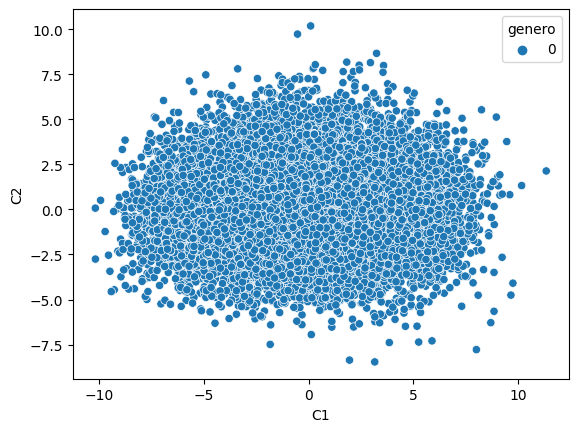

In [20]:
# Extraer las filas donde la columna "clase" sea igual a 0
femenino = data[data['genero'] == 0]
sns.scatterplot(data=femenino, x="C1", y="C2", hue="genero")
print(femenino.shape)

(95624, 3)


<Axes: xlabel='C1', ylabel='C2'>

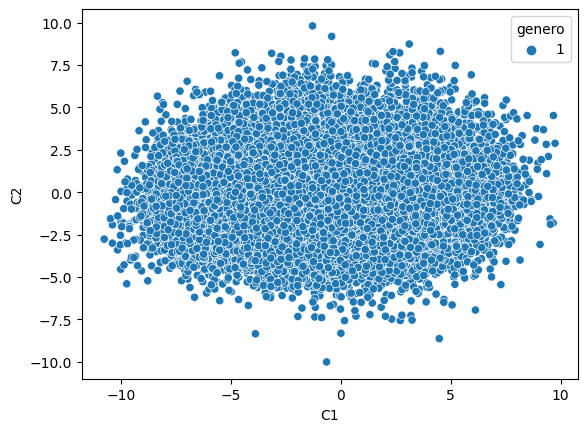

In [21]:
masculino = data[data['genero'] == 1]
print(masculino.shape)
sns.scatterplot(data=masculino, x="C1", y="C2", hue="genero")

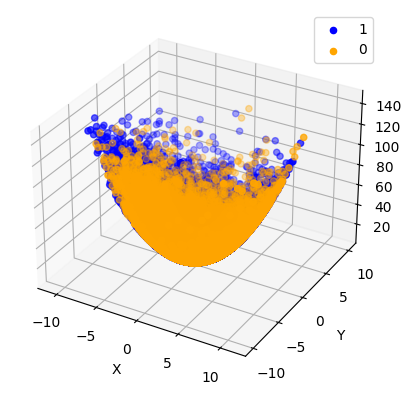

In [22]:
C3 = []
for coord in data.values:
    C3.append((coord[0]**2 + coord[1]**2)+10)

data['C3'] = C3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

In [23]:
pca = PCA(n_components=3)
x_train_transformed = pd.DataFrame(pca.fit_transform(X_train), columns=["C1","C2","C3"])
print(x_train_transformed.shape)
data = pd.concat([x_train_transformed, y_train], axis=1)
data

(144000, 3)


,C1,C2,C3,genero
0,1.068284,0.560304,-1.623608,1
1,0.325207,-2.271628,-0.324577,1
2,-1.407940,-1.335120,0.804948,1
3,0.575665,-2.227293,-1.339144,1
4,2.475130,-0.610129,-0.648784,1
...,...,...,...,...
143995,-1.736958,-2.032647,3.090788,1
143996,-0.985668,0.258670,-0.667858,0
143997,-1.654177,1.178368,-1.584553,0
143998,1.430815,0.386954,-3.220057,0


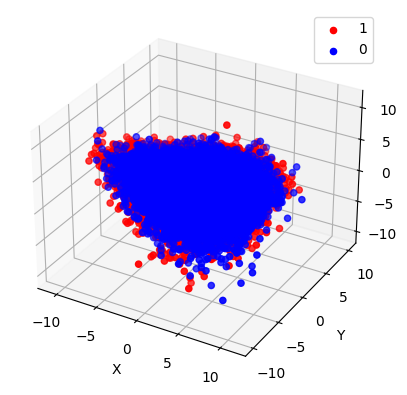

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['genero'].unique()
colors = ['red', 'blue','orange']  # Puedes personalizar los colores para cada clase si lo deseas

for clase, color in zip(classes, colors):
    subset =data[data['genero'] == clase]
    ax.scatter(subset['C1'], subset['C2'], subset['C3'], c=color, label=clase)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
#sns.scatterplot(data=data, x="C1", y="C2", hue="genero")